# **Tarea 3: Selección de Características**
**Nombre:** José Luis Cádiz

**ReadMe:** Ejecutar todo el código, si se ejecuta solo una parte aislada pueden existir errores, producto de que hay variables que se sobreescriben. **Subir archivo 'diabetes.arff' antes de ejecutar.**

# **Introducción:**

**En el contexto del curso ''Inteligencia Computacional'', se presentará a continuación el desarrollo de la ''Tarea 3'' del curso. Esta tarea pretende desarrollar el proceso de selección de features para clasificadores tipo SVM y Random Forest, para luego comparar el desempeño de ambos clasificadores en el contexto de detección de diabetes, haciendo uso de las librerías pandas, numpy, matplotlib y scikit-learn entre otras.**

**A continuación se explica a grandes razgos lo que se realizará en en la tarea: En la parte 1, se partirá por procesar los datos, separaparandolos en los conjuntos de Entrenamiento, Validación y Prueba. Luego estos conjuntos serán normalizados para el mejor funcionamiento del clasificador SVM.**
**Ya con los datos listos, se entrenan clasificadores SVM y Random Forest para distintas variantes de features: considerando todas las features, features seleccionadas según "SelectFromModel" y features según "SelectKBest" para k=2 y k=4. Luego sus desempeños son evaludos según accuracies y matrices de confusión.**
**Finalmente, se eligirá la mejor versión de SVM y Random Forest para evaluarlos en el conjunto de prueba.** 

**En la parte 2, se analizan los resultados de la parte 1, en donde se indica cual fue el mejor clasificador para la detección de diabetes y  el efecto/utilidad de la redución de features.**


**Finalmente, se termina el documento con las conclusiones principales de esta experiencia.**

In [ ]:
#Importando librerias:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from scipy.io import arff #Para leer archivos arff
#Libreria sklearn:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier

#Para el calculo de tiempos de entrenamiento:
import time

#Importar datos desde google drive:
#from google.colab import drive  #Se uso para no subir el archivo cada vez que se avanzaba en la tarea
#drive.mount('/content/drive')

**Parte 1: Pruebas**

**a)** Explicar brevemente cuáles son las características contenidas en el dataset:

**Leyendo el Dataset en un block de notas, las features se pueden describir como sigue:**
 1. **Number of times pregnant**: Indica número de veces que la mujer ha estado embarazada.
 2. **Plasma glucose concentration a 2 hours in an oral glucose tolerance test**: Indica la concentración de glucosa en plasma a 2 horas de una prueba de tolerancia oral a la glucosa.
 3. **Diastolic blood pressure (mm Hg)**: Indica la presión arterial diastólica.
 4. **Triceps skin fold thickness (mm)**: Indica 
Espesor del pliegue cutáneo del tríceps.
 5. **2-Hour serum insulin (mu U/ml)** indica Insulina sérica de 2 horas.
 6. **Body mass index (weight in kg/(height in m)^2)**: Indica el índice de masa corporal.
 7. **Diabetes pedigree function**: Indica la función del árbol genealógico de la diabetes.
 8. **Age (years)**: Indica la edad de la mujer.


**b)** Leer el archivo de diabetes usando pandas. Se debe reemplazar las etiquetas de la clase por los valores 0 y 1. Además se debe dividir en entrenamiento (60%), validación (20%) y prueba (20%) usando train_test_split:

In [ ]:
#Lectura del Dataset usando pandas:
#path = 'drive/My Drive/Inteligencia Computacional/diabetes.arff'
path='diabetes.arff'  #Subir archivo
data = arff.loadarff(path)
data = pd.DataFrame(data[0])
print('Lectura de datos:')
print('')
print(data.head())
print('')

#Se reemplazan las etiquetas por 0's y 1's:
data['class']=data['class'].replace({b"tested_positive":1,b"tested_negative":0}) 
print('Datos con etiqueta binaria:')
print('')
print(data.head())
print('')

#Ahora se procede a separar los conjuntos en entrenamiento, validación y prueba:
Entrenamiento, provisorio=train_test_split(data,test_size=0.4,shuffle=True,random_state=45) #60% para entrenamiento
Validacion, Prueba=train_test_split(provisorio,test_size=0.5,shuffle=True,random_state=45) #20% para validación y prueba
Entrenamiento=Entrenamiento.reset_index(drop=True) #Reinicio de indices
Validacion=Validacion.reset_index(drop=True) #Reinicio de indices
Prueba=Prueba.reset_index(drop=True) #Reinicio de indices
print('Entrenamiento:')
print('')
print(Entrenamiento.head())
print('')
print('Validacion:')
print('')
print(Validacion.head())
print('')
print('Prueba:')
print('')
print(Prueba.head())

Lectura de datos:

   preg   plas  pres  skin   insu  mass   pedi   age               class
0   6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0  b'tested_positive'
1   1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0  b'tested_negative'
2   8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0  b'tested_positive'
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0  b'tested_negative'
4   0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0  b'tested_positive'

Datos con etiqueta binaria:

   preg   plas  pres  skin   insu  mass   pedi   age  class
0   6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0      1
1   1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0      0
2   8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0      1
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0      0
4   0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0      1

Entrenamiento:

   preg   plas  pres  skin   insu  mass   pedi   age  class
0   2.0  128.0  64.0  42.0    0.0  40.0  1.101  24.0      0
1   2.0  144.0  

**c)** Preprocesar las características usando un StandardScaler:

In [ ]:
#Entrenamiento de StandardScaler:
features=["preg","plas","pres","skin","insu","mass","pedi","age"]
scaler = StandardScaler().fit(Entrenamiento[features])

#De los DataFrame Entrenamiento, validacion y prueba, guardamos y eliminamos la columna 'class' para poder escalar cada conjunto posteriormente:

#Guardar:
classentrenamiento=Entrenamiento["class"]
classvalidacion=Validacion["class"]
classprueba=Prueba["class"]

#Eliminar:
Entrenamiento=Entrenamiento.drop(['class'], axis=1)
Validacion=Validacion.drop(['class'], axis=1)
Prueba=Prueba.drop(['class'], axis=1)

#Escalamiento:
Entrenamiento = pd.DataFrame(scaler.transform(Entrenamiento))
Validacion = pd.DataFrame(scaler.transform(Validacion))
Prueba = pd.DataFrame(scaler.transform(Prueba))

#Volvemos a insertar nombre de columnas, producto de que scaler entrega un array, perdiendose la información del nombre de las columnas:
Entrenamiento.set_axis(features, axis=1, inplace=True)
Validacion.set_axis(features, axis=1, inplace=True)
Prueba.set_axis(features, axis=1, inplace=True)

#Se reincorporan las columnas 'class' de cada DataFrame:
Entrenamiento['class']=classentrenamiento
Validacion['class']=classvalidacion
Prueba['class']=classprueba

print('Entrenamiento:')
print('')
print(Entrenamiento.head())
print('')
print('Validacion:')
print('')
print(Validacion.head())
print('')
print('Prueba:')
print('')
print(Prueba.head())

Entrenamiento:

       preg      plas      pres      skin  ...      mass      pedi       age  class
0 -0.532391  0.208599 -0.227032  1.386294  ...  1.014897  1.953666 -0.774479      0
1 -0.532391  0.737460 -0.524566  0.815281  ... -0.005015 -0.157970 -0.687671      1
2 -0.242225 -1.278825 -0.524566  0.688389  ...  0.322814 -0.425424 -0.687671      0
3 -0.532391  0.241652  0.268859  0.371159  ...  0.189254  0.367606 -0.687671      0
4  1.208602  1.960453 -0.028675  1.005618  ... -0.187142  0.442244  2.350613      1

[5 rows x 9 columns]

Validacion:

       preg      plas      pres      skin  ...      mass      pedi       age  class
0 -0.822556 -1.344933  0.169681 -0.136409  ... -0.612106 -0.590249 -0.774479      0
1  0.918437  1.233268 -0.127854 -1.278436  ... -0.150717 -0.279257  0.267218      1
2  0.628271 -1.212717  0.467215 -1.278436  ... -0.053582 -0.282367  0.788067      0
3  0.918437 -0.254155 -0.127854 -1.278436  ...  0.140687 -0.667998  0.788067      1
4 -1.112721 -0.816071 -0

**d)** Realizar una clasificación inicial usando un clasificador svm lineal. Se debe usar una grilla sobre 
el hiperparámetro C. En esta tarea, en el grid search se debe usar el conjunto de validación para 
evaluar la calidad de los hiperparámetros. Además, se debe indicar el tiempo de entrenamiento:

In [ ]:
#Unión del conjunto de Entrenamiento y Validación:
Entre_Vali=pd.concat([Entrenamiento,Validacion])

#Indices para separar ambos conjuntos:
Entre_indice=np.full(len(Entrenamiento),-1)
Vali_indice=np.full(len(Validacion),0)
Indices=np.append(Entre_indice,Vali_indice)
x=PredefinedSplit(Indices)

##Grilla:
C=[0.0001, 0.001, 0.1]
model0=svm.SVC(kernel='linear', probability=False)
clf0=GridSearchCV(model0,{'C':C},cv=x) 

#Tiempo Inicial:
T1=time.time()

#Selección de hiperparametros del clasificador:
clf0.fit(Entre_Vali[features],Entre_Vali['class']) 

df=pd.DataFrame(clf0.cv_results_)
print('Tabla Resumen:')
print('')
print(df[['param_C','mean_test_score']])
print('')
print('Mejor Parámetro:')
print('')
print(clf0.best_params_)

#Reentrenamiento:
best_param=clf0.best_params_['C']
model0=svm.SVC(kernel='linear',C=best_param,probability=False)
#Entrenamiento de parámetros del clasificador:
clf0=model0.fit(Entrenamiento[features],Entrenamiento['class']) 

#Tiempo final:
T2=time.time()
T00=T2-T1
print('')
print('Tiempo de Entrenamiento: '+str(T00)+'[s]')




Tabla Resumen:

  param_C  mean_test_score
0  0.0001         0.662338
1   0.001         0.662338
2     0.1         0.759740

Mejor Parámetro:

{'C': 0.1}

Tiempo de Entrenamiento: 0.05362224578857422[s]


**e)** Generar una matriz de confusión normalizada para el clasificador inicial, calculando además el accuracy (el promedio de la diagonal), usando el conjunto de validación. Se debe usar sns.heatmap( ) para mostrar la matriz de confusión:


Clasificación del Conjunto de Validación:

     class  clasificacion
0        0              0
1        1              1
2        0              0
3        1              0
4        0              0
..     ...            ...
149      0              0
150      1              0
151      0              0
152      1              0
153      0              0

[154 rows x 2 columns]

Accuracy: 0.7597402597402597



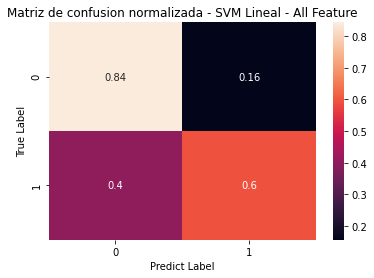

In [ ]:
#Clasificación del conjunto de validación con clasificador SVM lineal:
y_pred=pd.DataFrame(clf0.predict(Validacion[features])) #Usado para calcular la matriz de confusion
Validacion['clasificacion']=y_pred #Clasificación
y_true=Validacion['class'] #Clasificación true, usado para calcular la matriz de confusion
print('')
print('Clasificación del Conjunto de Validación:')
print('')
print(Validacion[['class','clasificacion']])
print('')

#Datos de la matriz de confusión:
Confusion=confusion_matrix(y_true, y_pred,normalize='true') 
Confusion=Confusion.astype(np.float64) #Se cambia el tipo de dato para obtener números decimales

#Matriz de confusión:
ax=sns.heatmap(Confusion, annot=True)
ax.set_title('Matriz de confusion normalizada - SVM Lineal - All Feature')
plt.xlabel('Predict Label')
plt.ylabel('True Label')

#Accuracy:
Accuracy0= metrics.accuracy_score(y_true, y_pred)
print('Accuracy: '+str(Accuracy0))
print('')



**Se observa una baja tasa de verdaderos positivos y una buena tasa de veraderos negativos.**

**f)** Realizar selección de características usando SelectFromModel (un clasificador de tipo wrapper), usando el mejor clasificador encontrado en el punto anterior (el que contiene los mejores hiperparámetros). Indique cuáles son las características seleccionadas:

In [ ]:
#Seleccion de features:
select=SelectFromModel(model0).fit(Entrenamiento[features],Entrenamiento['class'])

#Nuevas features:
indice=select.get_support(indices=True) #Se guardan los indices que corresponden a las features seleccionadas
new_feature1=[features[i] for i in indice]
print('Finalmente las features seleccionadas son: '+str(new_feature1))

Finalmente las features seleccionadas son: ['plas', 'mass']


**g)** Entrenar un segundo clasificador con el conjunto de características reducido, indicando el tiempo de entrenamiento:

In [ ]:
#Se agrega columna 'class'a la lista que contiene las features seleccionadas:
new_feature1.append('class')

#Unión del conjunto de Entrenamiento y Validación:
Entre_Vali=pd.concat([Entrenamiento[new_feature1],Validacion[new_feature1]]) #new_feature1 contiene la lista con las features seleccionadas

#Se elimina 'class' de new_feature1:
new_feature1.remove('class')

#Indices para separar ambos conjuntos:
Entre_indice=np.full(len(Entrenamiento),-1) #Los largos son los mismos que el conjunto con features seleccionadas
Vali_indice=np.full(len(Validacion),0)      #Los largos son los mismos que el conjunto con features seleccionadas
Indices=np.append(Entre_indice,Vali_indice)
x=PredefinedSplit(Indices)

##Grilla:
C=[0.0001, 0.001, 0.1]
model1=svm.SVC(kernel='linear', probability=False)
clf1=GridSearchCV(model1,{'C':C},cv=x) 

#Tiempo Inicial:
T1=time.time()

#Selección de hiperparametros del clasificador:
clf1.fit(Entre_Vali[new_feature1],Entre_Vali['class'])

df=pd.DataFrame(clf1.cv_results_)
print('Tabla Resumen:')
print('')
print(df[['param_C','mean_test_score']])
print('')
print('Mejor Parámetro:')
print('')
print(clf1.best_params_) 

#Reentrenamiento:
best_param=clf1.best_params_['C']
model1=svm.SVC(kernel='linear',C=best_param,probability=False)

#Entrenamiento de parámetros del clasificador:
clf1=model1.fit(Entrenamiento[new_feature1],Entrenamiento['class']) 

#Tiempo final:
T2=time.time()
T11=T2-T1
print('')
print('Tiempo de Entrenamiento: '+str(T11)+'[s]')


Tabla Resumen:

  param_C  mean_test_score
0  0.0001         0.662338
1   0.001         0.662338
2     0.1         0.759740

Mejor Parámetro:

{'C': 0.1}

Tiempo de Entrenamiento: 0.052842140197753906[s]


**Disminuyen los tiempos de entrenamiento producto de la reducción de features.**

**h)** Generar una matriz de confusión normalizada para el clasificador con características reducidas, calculando además el accuracy, usando el conjunto de validación. Se debe usar sns.heatmap( ) para mostrar la matriz de confusión:


     class  clasificacion
0        0              0
1        1              1
2        0              0
3        1              0
4        0              0
..     ...            ...
149      0              0
150      1              0
151      0              0
152      1              1
153      0              0

[154 rows x 2 columns]

Accuracy: 0.7597402597402597



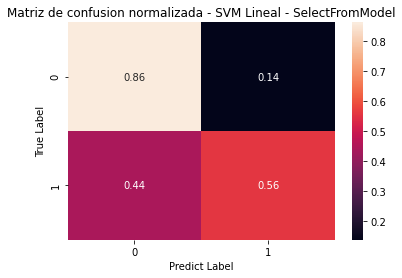

In [ ]:
#Clasificación del conjunto de validación con clasificador SVM lineal:
y_pred=pd.DataFrame(clf1.predict(Validacion[new_feature1])) #Usado para calcular la matriz de confusion
Validacion['clasificacion']=y_pred #Clasificación
y_true=Validacion['class'] #Clasificación true, usado para calcular la matriz de confusion
print('')
print(Validacion[['class','clasificacion']])
print('')

#Datos de la matriz de confusion:
Confusion=confusion_matrix(y_true, y_pred,normalize='true')
Confusion=Confusion.astype(np.float64) #Se cambia el tipo de dato para obtener números decimales

#Matriz de confusión:
ax=sns.heatmap(Confusion, annot=True)
ax.set_title('Matriz de confusion normalizada - SVM Lineal - SelectFromModel')
plt.xlabel('Predict Label')
plt.ylabel('True Label')

#Accuracy:
Accuracy1= metrics.accuracy_score(y_true, y_pred)
print('Accuracy: '+str(Accuracy1))
print('')

**En este caso accuracy no varia producto de la disminución de features.**

**i)** Repetir los pasos (g) y (h) usando un clasificador svm lineal, eligiendo las 4 mejores características encontradas por SelectKBest (método de tipo filtro):


In [ ]:
#Seleccion de mejores 4 features:
select=SelectKBest(k=4).fit(Entrenamiento[features],Entrenamiento['class']) #Entrenamiento para la seleccion
indice=select.get_support(indices=True) #Se guardan los indices que corresponden a las features seleccionadas
new_feature2=[features[i] for i in indice]
print('Finalmente las features seleccionadas son: '+str(new_feature2))


Finalmente las features seleccionadas son: ['plas', 'mass', 'pedi', 'age']


In [ ]:
#Parte g):

#Se agrega columna 'class'a la lista que contiene las features seleccionadas:
new_feature2.append('class')

#Unión del conjunto de Entrenamiento y Validación:
Entre_Vali=pd.concat([Entrenamiento[new_feature2],Validacion[new_feature2]]) #new_feature2 contiene la lista con las features seleccionadas

#Se elimina 'class' de new_feature2:
new_feature2.remove('class')

#Indices para separar ambos conjuntos:
Entre_indice=np.full(len(Entrenamiento),-1) #Los largos son los mismos que el conjunto con features seleccionadas
Vali_indice=np.full(len(Validacion),0)      #Los largos son los mismos que el conjunto con features seleccionadas
Indices=np.append(Entre_indice,Vali_indice)
x=PredefinedSplit(Indices)

##Grilla:
C=[0.0001, 0.001, 0.1]
model2=svm.SVC(kernel='linear', probability=False)
clf2=GridSearchCV(model2,{'C':C},cv=x) 

#Tiempo Inicial:
T1=time.time()

#Selección de hiperparametros del clasificador:
clf2.fit(Entre_Vali[new_feature2],Entre_Vali['class'])

df=pd.DataFrame(clf2.cv_results_)
print('Tabla Resumen:')
print('')
print(df[['param_C','mean_test_score']])
print('')
print('Mejor Parámetro:')
print('')
print(clf2.best_params_) 

#Reentrenamiento:
best_param=clf2.best_params_['C']
model2=svm.SVC(kernel='linear',C=best_param,probability=False)

#Entrenamiento de parámetros del clasificador:
clf2=model2.fit(Entrenamiento[new_feature2],Entrenamiento['class']) 

#Tiempo final:
T2=time.time()
T22=T2-T1
print('')
print('Tiempo de Entrenamiento: '+str(T22)+'[s]')

Tabla Resumen:

  param_C  mean_test_score
0  0.0001         0.662338
1   0.001         0.662338
2     0.1         0.785714

Mejor Parámetro:

{'C': 0.1}

Tiempo de Entrenamiento: 0.13765573501586914[s]


**Reducción del tiempo de entrenamiento.**


     class  clasificacion
0        0              0
1        1              1
2        0              0
3        1              0
4        0              0
..     ...            ...
149      0              0
150      1              0
151      0              0
152      1              1
153      0              0

[154 rows x 2 columns]

Accuracy: 0.7857142857142857



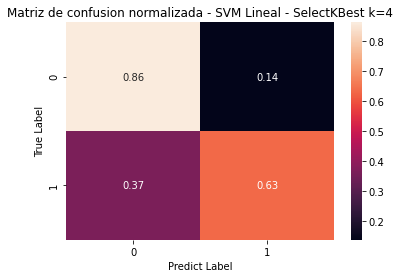

In [ ]:
#Parte h):

#Clasificación del conjunto de validación con clasificador SVM lineal:
y_pred=pd.DataFrame(clf2.predict(Validacion[new_feature2])) #Usado para calcular la matriz de confusion
Validacion['clasificacion']=y_pred #Clasificación
y_true=Validacion['class'] #Clasificación true, usado para calcular la matriz de confusion
print('')
print(Validacion[['class','clasificacion']])
print('')

#Datos de la matriz de confusion:
Confusion=confusion_matrix(y_true, y_pred,normalize='true')
Confusion=Confusion.astype(np.float64) #Se cambia el tipo de dato para obtener números decimales

#Matriz de confusión:
ax=sns.heatmap(Confusion, annot=True)
ax.set_title('Matriz de confusion normalizada - SVM Lineal - SelectKBest k=4')
plt.xlabel('Predict Label')
plt.ylabel('True Label')

#Accuracy:
Accuracy2= metrics.accuracy_score(y_true, y_pred)
print('Accuracy: '+str(Accuracy2))
print('')

**En este caso, además de disminuir los tiempos de entrenamiento, aumenta el accuracy del clasificador.**

**j)** Repetir los pasos (g) y (h) usando un clasificador svm lineal, eligiendo las 2 mejores características encontradas por SelectKBest:

In [ ]:
#Seleccion de mejores 2 features:
select=SelectKBest(k=2).fit(Entrenamiento[features],Entrenamiento['class']) #Entrenamiento para la seleccion
indice=select.get_support(indices=True) #Se guardan los indices que corresponden a las features seleccionadas
new_feature3=[features[i] for i in indice]
print('Finalmente las features seleccionadas son: '+str(new_feature3))

Finalmente las features seleccionadas son: ['plas', 'mass']


**Se obtienen las mismas features que con "SelectFromModel".**

In [ ]:
#Parte g):

#Se agrega columna 'class'a la lista que contiene las features seleccionadas:
new_feature3.append('class')

#Unión del conjunto de Entrenamiento y Validación:
Entre_Vali=pd.concat([Entrenamiento[new_feature3],Validacion[new_feature3]]) #new_feature3 contiene la lista con las features seleccionadas

#Se elimina 'class' de new_feature3:
new_feature3.remove('class')

#Indices para separar ambos conjuntos:
Entre_indice=np.full(len(Entrenamiento),-1) #Los largos son los mismos que el conjunto con features seleccionadas
Vali_indice=np.full(len(Validacion),0)      #Los largos son los mismos que el conjunto con features seleccionadas
Indices=np.append(Entre_indice,Vali_indice)
x=PredefinedSplit(Indices)

##Grilla:
C=[0.0001, 0.001, 0.1]
model3=svm.SVC(kernel='linear', probability=False)
clf3=GridSearchCV(model3,{'C':C},cv=x) 

#Tiempo Inicial:
T1=time.time()

#Selección de hiperparametros del clasificador:
clf3.fit(Entre_Vali[new_feature3],Entre_Vali['class'])

df=pd.DataFrame(clf3.cv_results_)
print('Tabla Resumen:')
print('')
print(df[['param_C','mean_test_score']])
print('')
print('Mejor Parámetro:')
print('')
print(clf3.best_params_) 

#Reentrenamiento:
best_param=clf3.best_params_['C']
model3=svm.SVC(kernel='linear',C=best_param,probability=False)

#Entrenamiento de parámetros del clasificador:
clf3=model3.fit(Entrenamiento[new_feature3],Entrenamiento['class']) 

#Tiempo final:
T2=time.time()
T3=T2-T1
print('')
print('Tiempo de Entrenamiento: '+str(T3)+'[s]')

Tabla Resumen:

  param_C  mean_test_score
0  0.0001         0.662338
1   0.001         0.662338
2     0.1         0.759740

Mejor Parámetro:

{'C': 0.1}

Tiempo de Entrenamiento: 0.038121938705444336[s]


**El tiempo de entrenamiento, no es el mismo que el de "SelectFromModel", esto se asocia a las variaciones de rendimiento de los computadores de google, ya que estos tiempos deberian ser los mismos al estar procesando exactamente las mismas variables.**


     class  clasificacion
0        0              0
1        1              1
2        0              0
3        1              0
4        0              0
..     ...            ...
149      0              0
150      1              0
151      0              0
152      1              1
153      0              0

[154 rows x 2 columns]

Accuracy: 0.7597402597402597



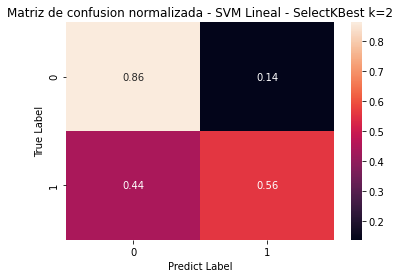

In [ ]:
#Parte h):

#Clasificación del conjunto de validación con clasificador SVM lineal:
y_pred=pd.DataFrame(clf3.predict(Validacion[new_feature3])) #Usado para calcular la matriz de confusion
Validacion['clasificacion']=y_pred #Clasificación
y_true=Validacion['class'] #Clasificación true, usado para calcular la matriz de confusion
print('')
print(Validacion[['class','clasificacion']])
print('')

#Datos de la matriz de confusion:
Confusion=confusion_matrix(y_true, y_pred,normalize='true')
Confusion=Confusion.astype(np.float64) #Se cambia el tipo de dato para obtener números decimales

#Matriz de confusión:
ax=sns.heatmap(Confusion, annot=True)
ax.set_title('Matriz de confusion normalizada - SVM Lineal - SelectKBest k=2')
plt.xlabel('Predict Label')
plt.ylabel('True Label')

#Accuracy:
Accuracy3= metrics.accuracy_score(y_true, y_pred)
print('Accuracy: '+str(Accuracy3))
print('')

**Se obtiene el mismo accuracy que en "SelectFromModel" dado que son los mismas features.**

**k)** Repetir el paso (d) y (e) usando un clasificador RandomForest, con una profundidad de 3 y usando una grilla sobre el hiperparámetro n_estimators:

In [ ]:
#Parte d):

#Unión del conjunto de Entrenamiento y Validación:
Entre_Vali=pd.concat([Entrenamiento,Validacion])

#Indices para separar ambos conjuntos:
Entre_indice=np.full(len(Entrenamiento),-1)
Vali_indice=np.full(len(Validacion),0)
Indices=np.append(Entre_indice,Vali_indice)
x=PredefinedSplit(Indices)

#Grilla:
arboles={'n_estimators':[50,100,150,200,250]}
model4=RandomForestClassifier(max_depth=3,random_state=0)
clf4=GridSearchCV(model4,arboles,cv=x)

#Tiempo Inicial:
T1=time.time()

#Selección de hiperparametros del clasificador:
clf4.fit(Entre_Vali[features],Entre_Vali['class']) 

df=pd.DataFrame(clf4.cv_results_)
print('Tabla Resumen:')
print('')
print(df[['param_n_estimators','mean_test_score']])
print('')
print('Mejor Parámetro:')
print('')
print(clf4.best_params_)

#Reentrenamiento:
best_param=clf4.best_params_['n_estimators']
model4=RandomForestClassifier(max_depth=3,n_estimators=best_param,random_state=0)
#Entrenamiento de parámetros del clasificador:
clf4=model4.fit(Entrenamiento[features],Entrenamiento['class']) 

#Tiempo final:
T2=time.time()
T4=T2-T1
print('')
print('Tiempo de Entrenamiento: '+str(T4)+'[s]')



Tabla Resumen:

  param_n_estimators  mean_test_score
0                 50         0.740260
1                100         0.779221
2                150         0.759740
3                200         0.766234
4                250         0.766234

Mejor Parámetro:

{'n_estimators': 100}

Tiempo de Entrenamiento: 1.4797255992889404[s]


**Número de arboles variará cada vez que se ejecute el código producto del proceso aleatorio interno que tiene el entrenamiento de Random Forest. También se puede observar que en este caso el tiempo de entrenamiento de Random Forest es mayor al de SVM, pero esto es solamente a que se esta usando valores de C muy particulares para resolver los procesos de optimización internos de SVM de forma rápida.**


Clasificación del Conjunto de Validación:

     class  clasificacion
0        0              0
1        1              1
2        0              0
3        1              0
4        0              0
..     ...            ...
149      0              0
150      1              0
151      0              0
152      1              0
153      0              0

[154 rows x 2 columns]

Accuracy: 0.7792207792207793



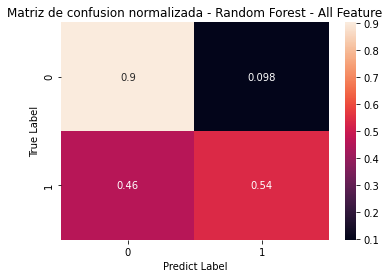

In [ ]:
#Parte e):

#Clasificación del conjunto de validación con clasificador Random Forest:
y_pred=pd.DataFrame(clf4.predict(Validacion[features])) #Usado para calcular la matriz de confusion
Validacion['clasificacion']=y_pred #Clasificación
y_true=Validacion['class'] #Clasificación true, usado para calcular la matriz de confusion
print('')
print('Clasificación del Conjunto de Validación:')
print('')
print(Validacion[['class','clasificacion']])
print('')

#Datos de la matriz de confusión:
Confusion=confusion_matrix(y_true, y_pred,normalize='true') 
Confusion=Confusion.astype(np.float64) #Se cambia el tipo de dato para obtener números decimales

#Matriz de confusión:
ax=sns.heatmap(Confusion, annot=True)
ax.set_title('Matriz de confusion normalizada - Random Forest - All Feature')
plt.xlabel('Predict Label')
plt.ylabel('True Label')

#Accuracy:
Accuracy4= metrics.accuracy_score(y_true, y_pred)
print('Accuracy: '+str(Accuracy4))
print('')


**Se obtiene una mala tasa de verdaderos positivos y una buena tasa de verdaderos negativos.**

**l)** Repetir los pasos (g) y (h) usando un clasificador RandomForest, usando el selector de características SelectFromModel:

In [ ]:
#Seleccion de features:
select=SelectFromModel(model4).fit(Entrenamiento[features],Entrenamiento['class'])

#Nuevas features:
indice=select.get_support(indices=True) #Se guardan los indices que corresponden a las features seleccionadas
new_feature5=[features[i] for i in indice]
print('Finalmente las features seleccionadas son: '+str(new_feature5))

Finalmente las features seleccionadas son: ['plas', 'mass', 'age']


In [ ]:
#Parte g):

#Se agrega columna 'class'a la lista que contiene las features seleccionadas:
new_feature5.append('class')

#Unión del conjunto de Entrenamiento y Validación:
Entre_Vali=pd.concat([Entrenamiento[new_feature5],Validacion[new_feature5]]) #new_feature5 contiene la lista con las features seleccionadas

#Se elimina 'class' de new_feature5:
new_feature5.remove('class')

#Indices para separar ambos conjuntos:
Entre_indice=np.full(len(Entrenamiento),-1) #Los largos son los mismos que el conjunto con features seleccionadas
Vali_indice=np.full(len(Validacion),0)      #Los largos son los mismos que el conjunto con features seleccionadas
Indices=np.append(Entre_indice,Vali_indice)
x=PredefinedSplit(Indices)

##Grilla:
arboles={'n_estimators':[50,100,150,200,250]}
model5=RandomForestClassifier(max_depth=3,random_state=0)
clf5=GridSearchCV(model5,arboles,cv=x)

#Tiempo Inicial:
T1=time.time()

#Selección de hiperparametros del clasificador:
clf5.fit(Entre_Vali[new_feature5],Entre_Vali['class']) 

df=pd.DataFrame(clf5.cv_results_)
print('Tabla Resumen:')
print('')
print(df[['param_n_estimators','mean_test_score']])
print('')
print('Mejor Parámetro:')
print('')
print(clf5.best_params_)

#Reentrenamiento:
best_param=clf5.best_params_['n_estimators']
model5=RandomForestClassifier(max_depth=3,n_estimators=best_param,random_state=0)
#Entrenamiento de parámetros del clasificador:
clf5=model5.fit(Entrenamiento[new_feature5],Entrenamiento['class']) 

#Tiempo final:
T2=time.time()
T5=T2-T1
print('')
print('Tiempo de Entrenamiento: '+str(T5)+'[s]')

Tabla Resumen:

  param_n_estimators  mean_test_score
0                 50         0.733766
1                100         0.746753
2                150         0.753247
3                200         0.740260
4                250         0.740260

Mejor Parámetro:

{'n_estimators': 150}

Tiempo de Entrenamiento: 1.5564863681793213[s]


**Se disminuye el tiempo de entrenamiento producto de la reducción de features.**


     class  clasificacion
0        0              0
1        1              1
2        0              0
3        1              0
4        0              0
..     ...            ...
149      0              0
150      1              0
151      0              0
152      1              1
153      0              0

[154 rows x 2 columns]

Accuracy: 0.7532467532467533



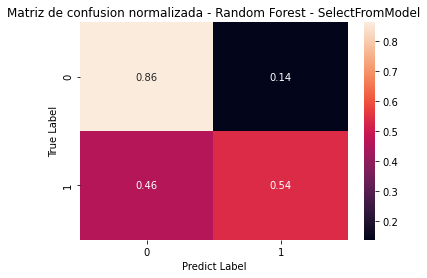

In [ ]:
#Parte h):

#Clasificación del conjunto de validación con clasificador Random Forest:
y_pred=pd.DataFrame(clf5.predict(Validacion[new_feature5])) #Usado para calcular la matriz de confusion
Validacion['clasificacion']=y_pred #Clasificación
y_true=Validacion['class'] #Clasificación true, usado para calcular la matriz de confusion
print('')
print(Validacion[['class','clasificacion']])
print('')

#Datos de la matriz de confusion:
Confusion=confusion_matrix(y_true, y_pred,normalize='true')
Confusion=Confusion.astype(np.float64) #Se cambia el tipo de dato para obtener números decimales

#Matriz de confusión:
ax=sns.heatmap(Confusion, annot=True)
ax.set_title('Matriz de confusion normalizada - Random Forest - SelectFromModel')
plt.xlabel('Predict Label')
plt.ylabel('True Label')

#Accuracy:
Accuracy5= metrics.accuracy_score(y_true, y_pred)
print('Accuracy: '+str(Accuracy5))
print('')

**Producto de la selección de features, disminuye el accuracy del clasificador.**

**m)** Repetir los pasos (g) y (h) usando un clasificador RandomForest, eligiendo las 4 mejores características encontradas por SelectKBest:

In [ ]:
#Seleccion de mejores 4 features:
select=SelectKBest(k=4).fit(Entrenamiento[features],Entrenamiento['class']) #Entrenamiento para la seleccion
indice=select.get_support(indices=True) #Se guardan los indices que corresponden a las features seleccionadas
new_feature6=[features[i] for i in indice]
print('Finalmente las features seleccionadas son: '+str(new_feature6))

Finalmente las features seleccionadas son: ['plas', 'mass', 'pedi', 'age']


In [ ]:
#Parte g):

#Se agrega columna 'class'a la lista que contiene las features seleccionadas:
new_feature6.append('class')

#Unión del conjunto de Entrenamiento y Validación:
Entre_Vali=pd.concat([Entrenamiento[new_feature6],Validacion[new_feature6]]) #new_feature6 contiene la lista con las features seleccionadas

#Se elimina 'class' de new_feature6:
new_feature6.remove('class')

#Indices para separar ambos conjuntos:
Entre_indice=np.full(len(Entrenamiento),-1) #Los largos son los mismos que el conjunto con features seleccionadas
Vali_indice=np.full(len(Validacion),0)      #Los largos son los mismos que el conjunto con features seleccionadas
Indices=np.append(Entre_indice,Vali_indice)
x=PredefinedSplit(Indices)

##Grilla:
arboles={'n_estimators':[50,100,150,200,250]}
model6=RandomForestClassifier(max_depth=3,random_state=0)
clf6=GridSearchCV(model6,arboles,cv=x)

#Tiempo Inicial:
T1=time.time()

#Selección de hiperparametros del clasificador:
clf6.fit(Entre_Vali[new_feature6],Entre_Vali['class']) 

df=pd.DataFrame(clf6.cv_results_)
print('Tabla Resumen:')
print('')
print(df[['param_n_estimators','mean_test_score']])
print('')
print('Mejor Parámetro:')
print('')
print(clf6.best_params_)

#Reentrenamiento:
best_param=clf6.best_params_['n_estimators']
model6=RandomForestClassifier(max_depth=3,n_estimators=best_param,random_state=0)
#Entrenamiento de parámetros del clasificador:
clf6=model6.fit(Entrenamiento[new_feature6],Entrenamiento['class']) 

#Tiempo final:
T2=time.time()
T6=T2-T1
print('')
print('Tiempo de Entrenamiento: '+str(T6)+'[s]')

Tabla Resumen:

  param_n_estimators  mean_test_score
0                 50         0.740260
1                100         0.720779
2                150         0.720779
3                200         0.733766
4                250         0.740260

Mejor Parámetro:

{'n_estimators': 50}

Tiempo de Entrenamiento: 1.4180033206939697[s]


**Tiempos de entrenamiento se reducen.**


     class  clasificacion
0        0              0
1        1              1
2        0              0
3        1              0
4        0              0
..     ...            ...
149      0              0
150      1              0
151      0              0
152      1              0
153      0              0

[154 rows x 2 columns]

Accuracy: 0.7402597402597403



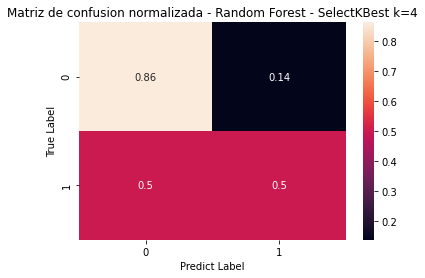

In [ ]:
#Parte h):

#Clasificación del conjunto de validación con clasificador Random Forest:
y_pred=pd.DataFrame(clf6.predict(Validacion[new_feature6])) #Usado para calcular la matriz de confusion
Validacion['clasificacion']=y_pred #Clasificación
y_true=Validacion['class'] #Clasificación true, usado para calcular la matriz de confusion
print('')
print(Validacion[['class','clasificacion']])
print('')

#Datos de la matriz de confusion:
Confusion=confusion_matrix(y_true, y_pred,normalize='true')
Confusion=Confusion.astype(np.float64) #Se cambia el tipo de dato para obtener números decimales

#Matriz de confusión:
ax=sns.heatmap(Confusion, annot=True)
ax.set_title('Matriz de confusion normalizada - Random Forest - SelectKBest k=4')
plt.xlabel('Predict Label')
plt.ylabel('True Label')

#Accuracy:
Accuracy6= metrics.accuracy_score(y_true, y_pred)
print('Accuracy: '+str(Accuracy6))
print('')

**El accuracy disminuye aun más respecto de "SelectFromModel".**

**n)** Repetir los pasos (g) y (h) usando un clasificador RandomForest, eligiendo las 2 mejores características encontradas por SelectKBest:

In [ ]:
#Seleccion de mejores 2 features:
select=SelectKBest(k=2).fit(Entrenamiento[features],Entrenamiento['class']) #Entrenamiento para la seleccion
indice=select.get_support(indices=True) #Se guardan los indices que corresponden a las features seleccionadas
new_feature7=[features[i] for i in indice]
print('Finalmente las features seleccionadas son: '+str(new_feature7))

Finalmente las features seleccionadas son: ['plas', 'mass']


**Se obtienen los mismos features que para el caso SVM, esto es porque este proceso de selección de features, es independiente del modelo.**

In [ ]:
#Parte g):

#Se agrega columna 'class'a la lista que contiene las features seleccionadas:
new_feature7.append('class')

#Unión del conjunto de Entrenamiento y Validación:
Entre_Vali=pd.concat([Entrenamiento[new_feature7],Validacion[new_feature7]]) #new_feature7 contiene la lista con las features seleccionadas

#Se elimina 'class' de new_feature7:
new_feature7.remove('class')

#Indices para separar ambos conjuntos:
Entre_indice=np.full(len(Entrenamiento),-1) #Los largos son los mismos que el conjunto con features seleccionadas
Vali_indice=np.full(len(Validacion),0)      #Los largos son los mismos que el conjunto con features seleccionadas
Indices=np.append(Entre_indice,Vali_indice)
x=PredefinedSplit(Indices)

##Grilla:
arboles={'n_estimators':[50,100,150,200,250]}
model7=RandomForestClassifier(max_depth=3,random_state=0)
clf7=GridSearchCV(model7,arboles,cv=x)

#Tiempo Inicial:
T1=time.time()

#Selección de hiperparametros del clasificador:
clf7.fit(Entre_Vali[new_feature7],Entre_Vali['class']) 

df=pd.DataFrame(clf7.cv_results_)
print('Tabla Resumen:')
print('')
print(df[['param_n_estimators','mean_test_score']])
print('')
print('Mejor Parámetro:')
print('')
print(clf7.best_params_)

#Reentrenamiento:
best_param=clf7.best_params_['n_estimators']
model7=RandomForestClassifier(max_depth=3,n_estimators=best_param,random_state=0)
#Entrenamiento de parámetros del clasificador:
clf7=model7.fit(Entrenamiento[new_feature7],Entrenamiento['class']) 

#Tiempo final:
T2=time.time()
T7=T2-T1
print('')
print('Tiempo de Entrenamiento: '+str(T7)+'[s]')

Tabla Resumen:

  param_n_estimators  mean_test_score
0                 50         0.740260
1                100         0.714286
2                150         0.714286
3                200         0.714286
4                250         0.714286

Mejor Parámetro:

{'n_estimators': 50}

Tiempo de Entrenamiento: 1.301703691482544[s]



     class  clasificacion
0        0              0
1        1              1
2        0              0
3        1              0
4        0              0
..     ...            ...
149      0              0
150      1              0
151      0              0
152      1              1
153      0              0

[154 rows x 2 columns]

Accuracy: 0.7402597402597403



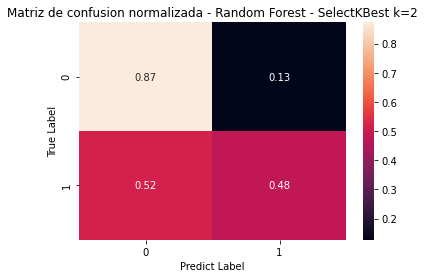

In [ ]:
#Parte h):

#Clasificación del conjunto de validación con clasificador Random Forest:
y_pred=pd.DataFrame(clf7.predict(Validacion[new_feature7])) #Usado para calcular la matriz de confusion
Validacion['clasificacion']=y_pred #Clasificación
y_true=Validacion['class'] #Clasificación true, usado para calcular la matriz de confusion
print('')
print(Validacion[['class','clasificacion']])
print('')

#Datos de la matriz de confusion:
Confusion=confusion_matrix(y_true, y_pred,normalize='true')
Confusion=Confusion.astype(np.float64) #Se cambia el tipo de dato para obtener números decimales

#Matriz de confusión:
ax=sns.heatmap(Confusion, annot=True)
ax.set_title('Matriz de confusion normalizada - Random Forest - SelectKBest k=2')
plt.xlabel('Predict Label')
plt.ylabel('True Label')

#Accuracy:
Accuracy7= metrics.accuracy_score(y_true, y_pred)
print('Accuracy: '+str(Accuracy7))
print('')

**o)** Evalúe el mejor svm y el mejor random forest encontrados con características reducidas sobre el conjunto de prueba, indicando sus matrices de confusión normalizadas y sus accuracies:

**Comparando matrices de confusion y accuracies, el mejor SVM es el que clasifica según SelectKBest (método de tipo filtro) con k=4 y el mejor Random Forest es el que clasifica según SelectFromModel (un clasificador de tipo wrapper).**

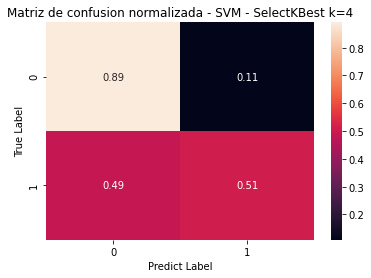


Accuracy: 0.7597402597402597



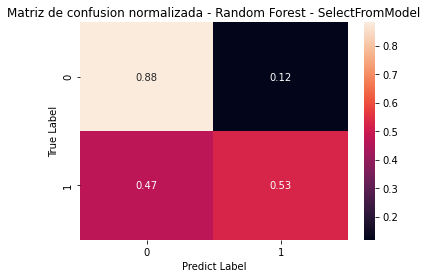


Accuracy: 0.7597402597402597



In [ ]:
#SVM:

#SelectKBest 4:
y_predSVM=pd.DataFrame(clf2.predict(Prueba[new_feature2])) #Usado para calcular la matriz de confusion
y_trueSVM=Prueba['class']

#Matriz de confusion y accuracy:

#Datos de la matriz de confusion:
Confusion=confusion_matrix(y_trueSVM, y_predSVM,normalize='true')
Confusion=Confusion.astype(np.float64) #Se cambia el tipo de dato para obtener números decimales

#Matriz de confusión:
ax=sns.heatmap(Confusion, annot=True)
ax.set_title('Matriz de confusion normalizada - SVM - SelectKBest k=4')
plt.xlabel('Predict Label')
plt.ylabel('True Label')
plt.show()

#Accuracy:
AccuracySVM= metrics.accuracy_score(y_trueSVM, y_predSVM)
print('')
print('Accuracy: '+str(AccuracySVM))
print('')

#Random Forest:

#SelectFromModel:
y_predRF=pd.DataFrame(clf5.predict(Prueba[new_feature5])) #Usado para calcular la matriz de confusion
y_trueRF=Prueba['class']

#Matriz de confusion y accuracy:

#Datos de la matriz de confusion:
Confusion=confusion_matrix(y_trueRF, y_predRF,normalize='true')
Confusion=Confusion.astype(np.float64) #Se cambia el tipo de dato para obtener números decimales

#Matriz de confusión:
ax=sns.heatmap(Confusion, annot=True)
ax.set_title('Matriz de confusion normalizada - Random Forest - SelectFromModel')
plt.xlabel('Predict Label')
plt.ylabel('True Label')
plt.show()

#Accuracy:
AccuracyRF= metrics.accuracy_score(y_trueRF, y_predRF)
print('')
print('Accuracy: '+str(AccuracyRF))
print('')

In [ ]:
#Se comprueba el hecho de que los accuracies de ambos clasificadores son exactamente iguales, lo cual es muy extraño:
AccuracyRF==AccuracySVM

True

**Parte 2: Análisis**

**a)** Indique qué tipo de clasificador (svm lineal o random forest) entrega en general mejores resultados:



 **Para comparar el desempeño del mejor SVM lineal con el mejor Random Forest, nos basamos en los resultados obtenidos en el item o) de la parte 1. Dado que en este caso particular los accuracies son exactamente iguales, discriminaremos según las matrices de confusión.**

**En el contexto del problema a resolver, es decir, detección de diabetes, lo más importante es detectar a los verdaderos positivos y no tanto los verdaderos negativos, ya que bastaria volver a hacerse otro examen si es que se detecta diabetes de forma incorrecta (falso positivo) y se debe evitar un caso en el cual a una persona enferma se le diga que esta sana. En ese sentido, el que tiene mayor tasa de detección de verdaderos positivos será el mejor, en este caso es el clasificador Random Forest.**

**A modo de observación final, ambas tasas de detección de verdaderos positivos son muy bajos, en torno al 0.5, los cual no es deseable considerando la necesisidad de tener una alta tasa dado el contexto de salud que involucra. Por otro lado, las tasas de verdaderos negativos es alta en torno al 0.9, requerimiento que puede ser flexible en este caso. Teniendo en cuenta que no se satisfacen estos requerimientos básicos, se recomienda evaluar otros clasificadores estadisticos que sean capaces de tener un mayor rendimiento.**

**b)** Indique el efecto de reducir características sobre el accuracy obtenido. Considere el número de características seleccionadas v/s el accuracy obtenido:

**Antes de comenzar el análisis, se dejará un cuadro resumen para cada clasificador, considerando accuracies, número de features, y tiempos de entrenamiento:**

In [ ]:
#SVM:

M1={'Clasificador':{},'Accuracy':{},'Número features seleccionadas':{},'Tiempo de entrenamiento [s]':{}}
M1=pd.DataFrame(M1)
M1['Clasificador']=['Clasificador SVM lineal','Clasificador SVM lineal SelectFromModel','Clasificador SVM lineal SelectKBest k=4','Clasificador SVM lineal SelectKBest k=2']
M1['Accuracy']=[Accuracy0,Accuracy1,Accuracy2,Accuracy3]
M1['Número features seleccionadas']=[len(features), len(new_feature1),len(new_feature2),len(new_feature3)]
M1['Tiempo de entrenamiento [s]']=[T00,T11,T22,T3]
M1.drop(['Tiempo de entrenamiento [s]'], axis=1,inplace=True)

In [ ]:
#Cuadro resumen SVM:
M1.head()

,Clasificador,Accuracy,Número features seleccionadas
0,Clasificador SVM lineal,0.759740,8
1,Clasificador SVM lineal SelectFromModel,0.759740,2
2,Clasificador SVM lineal SelectKBest k=4,0.785714,4
3,Clasificador SVM lineal SelectKBest k=2,0.759740,2


In [ ]:
#Random Forest:

M2={'Clasificador':{},'Accuracy':{},'Número features seleccionadas':{},'Tiempo de entrenamiento [s]':{}}
M2=pd.DataFrame(M2)
M2['Clasificador']=['Clasificador Random Forest','Clasificador Random Forest SelectFromModel','Clasificador Random Forest SelectKBest k=4','Clasificador Random Forest SelectKBest k=2']
M2['Accuracy']=[Accuracy0,Accuracy5,Accuracy6,Accuracy7]
M2['Número features seleccionadas']=[len(features), len(new_feature5),len(new_feature6),len(new_feature7)]
M2['Tiempo de entrenamiento [s]']=[T4,T5,T6,T7]
M2.drop(['Tiempo de entrenamiento [s]'], axis=1,inplace=True)



In [ ]:
#Cuadro resumen Random Forest:
M2.head()

,Clasificador,Accuracy,Número features seleccionadas
0,Clasificador Random Forest,0.759740,8
1,Clasificador Random Forest SelectFromModel,0.753247,3
2,Clasificador Random Forest SelectKBest k=4,0.740260,4
3,Clasificador Random Forest SelectKBest k=2,0.740260,2


**Para el caso del SVM, al reducir features con "SelectFromModel", este elimina features que no aportan al rendimiento, por lo que en este caso, el accuracy no cambia pero si se reduce el tiempo de entrenamiento. Por otro lado, al reducir features con "SelectKBest", para el caso de K=4 se aumenta el accuracy y además se reduce el tiempo de entrenamiento y para el caso k=2 el accuracy disminuye.**


**Para el caso de Random Forest, al reducir features con "SelectFromModel", elimina features que practicamente obtienen los mismos accuracies y tiempos de entrenamiento. Por otro lado, al reducir features con "SelectKBest" para el caso k=2 y k=4, disminuyen los accuracies.**


**Finalmente, se desprende que el proceso de selección de features según sea el caso, puede llegar a mejorar el desempeño del clasificador, ya que hay features que solo son ruido. Otra posibilidad que se puede dar es que el accuracy disminuya, pero tambien disminuyan los tiempos de entrenamiento, tiempo que según que tanto disminuya podria ser deseable a costa de perder un poco de accuracy cuando el número de features es de un orden mucho mayor.**

**c)** Según los resultados de los dos puntos anteriores, analice la utilidad de la reducción de características para el conjunto de datos usado:

**A partir de las partes 1 y 2, se desprende que la utilidad de la reducción de features en el caso óptimo, es aumentar el accuracy eliminando features que solo son ruido para la clasificicación y disminuir tiempos de entrenamiento al reducir la cantidad de features a procesar.**

**Cabe destacar que el caso óptimo no siempre se da, por lo que otras posibilidades que se pueden dar al reducir features es que el accuracy no cambie y el tiempo de entrenamiento disminuya, otra opción es que el accuracy disminuya junto con el tiempo de entrenamiento.**

**En el caso en que el accuracy disminuya se debera evaluar si esta disminución de accuracy se compensa con la reducción del tiempo de entrenamiento. En este caso al ser pocas features, la reducción del tiempo de entrenamiento no compensaba la disminución del accuracy, por lo que en este caso, habría que elegir el conjunto de features que maximice el accuracy.**

# **Conclusiones:**

**En esta tarea se comprendio el proceso iterativo para elegir los mejores hiperparámetros haciendo uso del conjunto de entrenamiento y validación, ya que en tareas pasadas este proceso de selección se hacia mediante "Cross Validation". Tambien se comprendio el proceso de selección de features, el cual es un proceso iterativo en donde el diseñador debe elegir cual es el mejor conjunto de features, analizando las variaciones en el desempeño y tiempos de entrenamiento. Tambien de aprendio a entrenar a entrenar un clasificador Random Forest.**

**En cuanto a dificultades, la tarea en si fue un tanto repetitiva por lo que en un principio se sintio que habría mucho que programar, sin embargo esto se soluciono haciendo un "código reciclable" de modo de usar las partes anteriores ya hechas, teniendo que cambiar solo detalles.**

**En cuanto a los resultados obtenidos, se encontro un resultado anomalo en donde se obtiene exactamente el mismo accuracy para el clasificador SVM y Random Forest en el conjunto de prueba. Otro punto a destacar es que sorprenden las bajas tasas de verdaderos positivos que entregan los dos clasificadores, por lo que estos no son adecuados para la detección de diabetes.**
**Tambien se observo que el número de arboles para el clasificador Random Forest cambia cada vez que se ejecuta el código, pero esto concuerda con lo que indica la teoría ya que, en cada proceso de entrenamiento hay un proceso aleatorio, el cual es el proceso de selección de features de cada arbol.**
**Finalemente, el mejor clasificador es el Random Forest, el cual es mejor por centesimas respecto del SVM, observando la tasa de verdaderos positivos.**

**En este caso no hay modo de mejorar el desempeño de los algoritmos, ya que se utilizaron librerias en donde los códigos de programación estan predefinidos.**

In [ ]:
#%cd ../

In [ ]:
#Carpeta:
#%cd /content/drive/MyDrive/Colab Notebooks 

In [ ]:
#Install:
#!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

In [ ]:
#A PDF:
#!jupyter nbconvert --to pdf tarea3ic.ipynb